# Midterm 2 - Assignment 5

## Main objective

Learn the structure of the Bayesian Network (BN) resulting from the dataset (https://archive.ics.uci.edu/dataset/19/car+evaluation) using two BN structure learning algorithms of your choice.  For instance you can consider the algorithms implemented in PGMPY or any other comparable library (e.g. see the list of libraries listed in Lecture 7).  Compare and discuss the results obtained with the two different algorithms. Also discuss any hyperparameter/design choice you had to take.

### Choices made

For this assignment I chose the PC algorithm and the Hill Climbing algorithm to learn the structure of the Bayesian Network. The PC algorithm is a constraint-based algorithm that uses conditional independence tests to learn the structure of the network. The Hill Climbing algorithm is a score-based algorithm that uses a scoring function to evaluate the quality of the network structure.

## Data processing

From the dataset I applied One-hot encoding to the categorical features, since we have more than 2 categories for each feature. I also split the dataset into training and testing sets, with 80% of the data used for training and 20% for testing.

For completeness, I made possible to use the raw data, the data One-hot encoded with sklearn and the data One-hot encoded with pandas. The user can comment and uncomment the relative lines of code that I specified.

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(url, names=names)

# Display the first few rows of the dataset
print(data.head())

# Preprocessing
# Check for missing values
print(data.isnull().sum())

# Assuming 'data' is the original dataset containing features and target variable
# Extract features (X) and target variable (y)
X = data.drop(columns=['class'])  # Features
y = data['class']  # Target variable

# One-hot encode the features and target variable, with 0 and 1 like sklearn does
# to use them, uncomment the lines that use np.append and comment the lines that use pd.concat

#X_encoded = OneHotEncoder().fit_transform(X).toarray()
#y_encoded = OneHotEncoder().fit_transform(y.values.reshape(-1, 1)).toarray()

# Data encoded with pandas, uncomment the following lines and the next commented lines that use pd.concat
X_encoded = pd.get_dummies(X)
y_encoded = pd.get_dummies(y)

# Concatenate the features and target variable
#data_encoded = np.append(X_encoded, y_encoded, axis=1)
data_encoded = pd.concat([X_encoded, y_encoded], axis=1)

# Split the dataset into training and test sets, uncomment the second line to use raw data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Unencoded data

# Encoded data sets for training and testing
data_train_encoded = np.append(X_train, y_train, axis=1)
data_test_encoded = np.append(X_test, y_test, axis=1)

# Unencoded data sets for training and testing
#data_train_unencoded = pd.concat([X_train, y_train], axis=1)
#data_test_unencoded = pd.concat([X_test, y_test], axis=1)

data_train_encoded = pd.concat([X_train, y_train], axis=1)
data_test_encoded = pd.concat([X_test, y_test], axis=1)

print("TR data")
print(data_train_encoded)
print("\n")
print("TS data")
print(data_test_encoded)

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64
TR data
      buying_high  buying_low  buying_med  ...   good  unacc  vgood
107         False       False       False  ...  False   True  False
901         False       False        True  ...  False   True  False
1709        False        True       False  ...  False   True  False
706          True       False       False  ...  False   True  False
678          True       False       False  ...  False   True  False
...           ...         ...         ...  ...    ...    ...    ...
1130        False       False        True  ...  False  False   True
1294        False  

## PC algorithm

In this section I have instantiate a Bayesian Network with the method of the library pgmpy and used the PC algorithm to learn the structure of the network. Then, I added the nodes and edges to the model.

Initially, during testing I used the default variant of the PC algorithm, but since it was slow to compute the result, I used the 'parallel' variant, which is faster.

#### Hyperparameters

- variant: I chose the 'parallel' variant proposed by pgmpy because it exploits parallelism to speed up the algorithm.
- significance_level: I chose the significance level of 0.01, the most common are 0.01 and 0.05.

Working for n conditional variables: 5: 100%|██████████| 5/5 [00:01<00:00,  3.01it/s]
/opt/homebrew/anaconda3/envs/ispr/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


Nodes and edges of the PC model:
['lug_boot_med', 'lug_boot_small', 'acc', 'unacc', 'safety_high', 'safety_low', 'safety_med', 'maint_low', 'maint_high', 'persons_more', 'persons_2', 'persons_4', 'buying_med', 'buying_vhigh', 'buying_high', 'good', 'vgood', 'maint_med', 'lug_boot_big', 'buying_low', 'maint_vhigh', 'doors_3', 'doors_2', 'doors_4', 'doors_5more']
[('lug_boot_med', 'lug_boot_small'), ('acc', 'good'), ('acc', 'unacc'), ('safety_high', 'safety_low'), ('safety_high', 'vgood'), ('safety_med', 'safety_low'), ('safety_med', 'vgood'), ('safety_med', 'safety_high'), ('maint_low', 'maint_high'), ('maint_low', 'maint_med'), ('persons_more', 'persons_2'), ('persons_2', 'unacc'), ('persons_4', 'persons_2'), ('persons_4', 'persons_more'), ('buying_med', 'buying_high'), ('buying_med', 'buying_vhigh'), ('maint_med', 'maint_high'), ('lug_boot_big', 'lug_boot_small'), ('lug_boot_big', 'lug_boot_med'), ('buying_low', 'buying_high'), ('buying_low', 'buying_vhigh'), ('buying_low', 'buying_me

/opt/homebrew/anaconda3/envs/ispr/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/ispr/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/ispr/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inches_restore" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


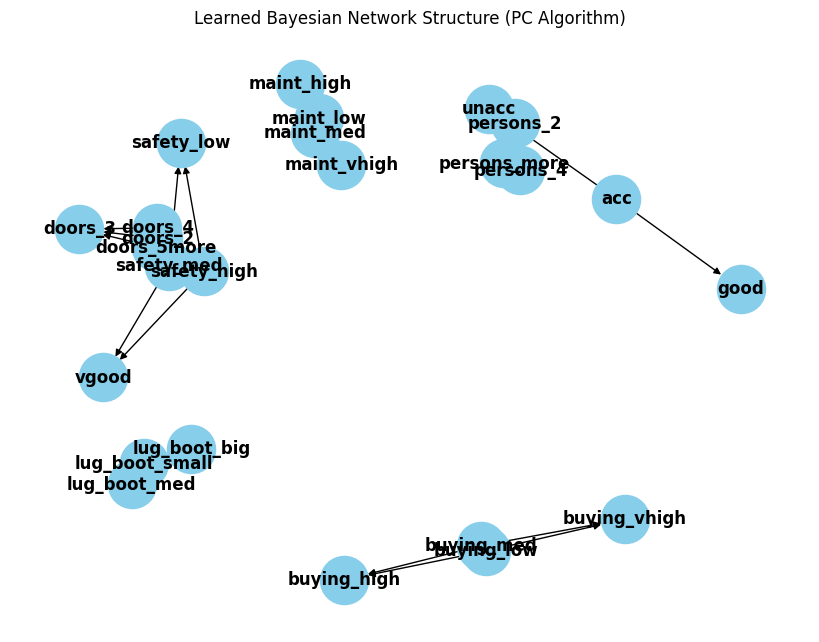

In [20]:
from pgmpy.estimators import PC
from pgmpy.models import BayesianNetwork
from try_plot import plot_graph
# Initialize the PC algorithm with data and a different significance level
model_pc = BayesianNetwork()
pc = PC(pd.DataFrame(data_train_encoded))

# Constraint-based structure learning, with PC algorithm
dag = pc.estimate(return_type='dag', variant='parallel', significance_level=0.01)

model_pc.add_nodes_from(dag.nodes())    
model_pc.add_edges_from(dag.edges())

# Display the edges of the learned structure
print("Nodes and edges of the PC model:")
print(model_pc.nodes())
print(model_pc.edges())

# Plot (optional)
plot_graph(model_pc)

## Hill Climbing Algorithm

In this section I have instantiate a Bayesian Network with the method of the library pgmpy and used the Hill Climbing algorithm to learn the structure of the network. Then, I added the nodes and edges to the model, as I did with the PC algorithm.

The Hill Climbing algorithm is also computationally expensive, but it is faster than the PC algorithm. We can clearly see that the HC algorithm takes less than a second to complete. This fact can be nice and bad at the same time, because it can be stuck in a local maxima.

#### Hyperparameters
- scoring method: I chose the K2 score, which I tested with the dataset and it gave the best results, compared to the other proposed scores.

- The other hyperparameters were kept as default, as I thought they were not important for the purpose of this assignment (I can be absolutely wrong).

  0%|          | 56/1000000 [00:00<4:34:55, 60.62it/s]
/opt/homebrew/anaconda3/envs/ispr/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


Nodes and edges of the HC model:
['buying_high', 'buying_low', 'buying_med', 'buying_vhigh', 'maint_high', 'maint_low', 'maint_med', 'maint_vhigh', 'doors_2', 'doors_3', 'doors_4', 'doors_5more', 'persons_2', 'persons_4', 'persons_more', 'lug_boot_big', 'lug_boot_med', 'lug_boot_small', 'safety_high', 'safety_low', 'safety_med', 'acc', 'good', 'unacc', 'vgood']
[('buying_high', 'buying_med'), ('buying_high', 'buying_low'), ('buying_high', 'persons_2'), ('buying_low', 'buying_med'), ('buying_vhigh', 'buying_med'), ('buying_vhigh', 'buying_low'), ('buying_vhigh', 'buying_high'), ('buying_vhigh', 'persons_2'), ('maint_high', 'buying_vhigh'), ('maint_low', 'maint_high'), ('maint_low', 'maint_med'), ('maint_med', 'maint_high'), ('maint_vhigh', 'maint_high'), ('maint_vhigh', 'maint_med'), ('maint_vhigh', 'buying_vhigh'), ('maint_vhigh', 'maint_low'), ('doors_3', 'doors_2'), ('doors_3', 'doors_4'), ('doors_3', 'doors_5more'), ('doors_4', 'doors_2'), ('doors_5more', 'doors_2'), ('doors_5more',

/opt/homebrew/anaconda3/envs/ispr/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/ispr/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/ispr/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inches_restore" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


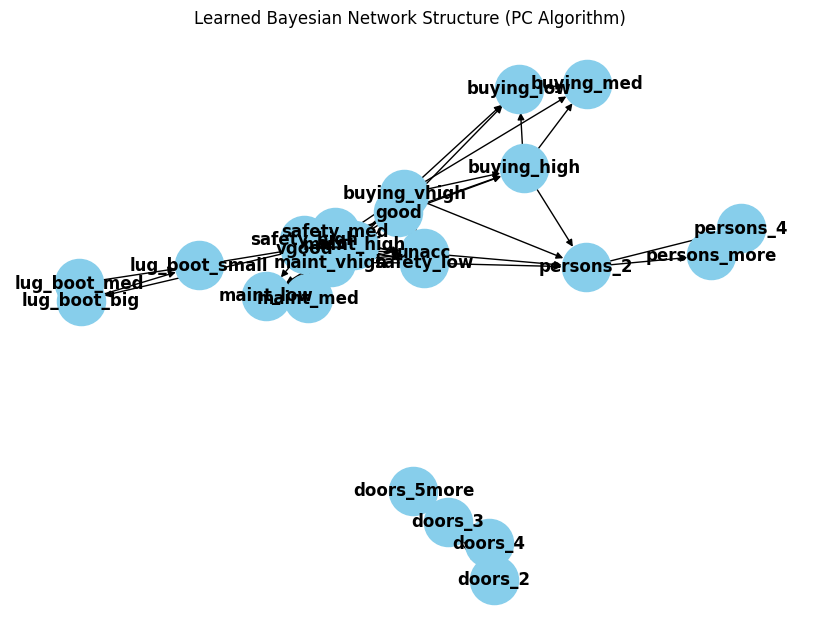

In [21]:
# Learning with hill climbing
from pgmpy.estimators import HillClimbSearch

# Initialize the Hill Climbing search
model_hc = BayesianNetwork()
hc = HillClimbSearch(pd.DataFrame(data_train_encoded))

# Structure learning with Hill Climbing search algorithm
best_model = hc.estimate(scoring_method='k2score')

model_hc.add_nodes_from(best_model.nodes())
model_hc.add_edges_from(best_model.edges())
print("Nodes and edges of the HC model:")
print(model_hc.nodes())
print(model_hc.edges())

# Plot (optional)
plot_graph(model_hc)


#### Little sidenote

I also tried and inserted the Max-min Hill Climbing search but it was taking too long to complete (when data is one-hot encoded), so I decided to remove it from the final version of the code. I left it commented in the code for reference.

In [22]:
'''
# MmHC algorithm
from pgmpy.estimators import MmhcEstimator

# Initialize the MmHC algorithm
model_mmhc = BayesianNetwork()
mmhc = MmhcEstimator(pd.DataFrame(data_train_encoded))

# Structure learning with MmHC algorithm
best_model = mmhc.estimate(scoring_method='k2score', significance_level=0.01)

model_mmhc.add_nodes_from(best_model.nodes())
model_mmhc.add_edges_from(best_model.edges())
print("Nodes and edges of the MMHC model:")
print(model_mmhc.nodes())
print(model_mmhc.edges())
'''

'\n# MmHC algorithm\nfrom pgmpy.estimators import MmhcEstimator\n\n# Initialize the MmHC algorithm\nmodel_mmhc = BayesianNetwork()\nmmhc = MmhcEstimator(pd.DataFrame(data_train_encoded))\n\n# Structure learning with MmHC algorithm\nbest_model = mmhc.estimate(scoring_method=\'k2score\', significance_level=0.01)\n\nmodel_mmhc.add_nodes_from(best_model.nodes())\nmodel_mmhc.add_edges_from(best_model.edges())\nprint("Nodes and edges of the MMHC model:")\nprint(model_mmhc.nodes())\nprint(model_mmhc.edges())\n'

## Data fitting

After learning the structure with the 2 methods, I fitted the training data into the models using the Maximum Likelihood Estimation (MLE) method for both of them.

Other estimator can be used, such as the Bayesian Estimator, but for this assignment I chose the MLE. 

In [23]:
# Learning with Maximum Likelihood Estimation, other methods are available
from pgmpy.estimators import MaximumLikelihoodEstimator

# Estimate parameters using Maximum Likelihood Estimation (MLE) for PC model
model_pc.fit(pd.DataFrame(data_train_encoded), estimator=MaximumLikelihoodEstimator)

# Estimate parameters using Maximum Likelihood Estimation (MLE) for HC model
model_hc.fit(pd.DataFrame(data_train_encoded), estimator=MaximumLikelihoodEstimator)


## Predictions 

After fitting the data into the models, I made predictions using the testing data. I used the predict() method to predict the values of the target variable given the values of the other variables.

In [24]:
# Predictions using PC model
y_pred_pc = model_pc.predict(pd.DataFrame(X_test))

print("Predictions using PC")
print(y_pred_pc)

# Predictions using HC model
y_pred_hc = model_hc.predict(pd.DataFrame(X_test))

print("Predictions using HC")
print(y_pred_hc)

100%|██████████| 346/346 [00:00<00:00, 3137.84it/s]


Predictions using PC
     unacc  vgood    acc   good
0     True  False  False  False
1     True  False  False  False
2     True  False  False  False
3     True  False  False  False
4     True  False  False  False
..     ...    ...    ...    ...
341   True  False  False  False
342   True  False  False  False
343   True  False  False  False
344   True  False  False  False
345   True  False  False  False

[346 rows x 4 columns]


100%|██████████| 346/346 [00:00<00:00, 2252.69it/s]


Predictions using HC
     unacc  vgood    acc   good
0     True  False  False  False
1    False  False   True  False
2     True  False  False  False
3    False  False   True  False
4     True  False  False  False
..     ...    ...    ...    ...
341   True  False  False  False
342   True  False  False  False
343   True  False  False  False
344   True  False  False  False
345   True  False  False  False

[346 rows x 4 columns]


#### Network dimensions

After training and testing the models I printed the number of nodes and edges of the networks.


In [25]:
# Get the number of nodes (variables) and edges in PC model
print("Total nodes in PC model:", len(model_pc.nodes()))
print("Total edges in PC model:", len(model_pc.edges()))

print("\n")

# Get the number of nodes (variables) and edges in HC model
print("Total nodes in HC model:", len(model_hc.nodes()))
print("Total edges in HC model:", len(model_hc.edges()))

Total nodes in PC model: 25
Total edges in PC model: 30


Total nodes in HC model: 25
Total edges in HC model: 55


## Final scores

After training and testing, I calculated 2 kinds of scoring methods used in the pgmpy library: structure and correlation scores. In particular, these scores are used to evaluate the quality of the structure of the Bayesian Network.

In scores.py I implemented the 2 methods that print all the possible structure and correlation scores for the models, in order to better evaluate the quality of the structure of the Bayesian Networks and compare them.

### Structure scores of the models

Structure scores in Bayesian networks are measures used to evaluate the goodness of fit of a Bayesian network structure to data. These scores are used in score-based learning algorithms, which aim to find the structure that maximizes the score given the data (like Hill Climbing and variants do).

As we can see from the results, the Hill Climbing algorithm has a slightly higher structure score (less negative) than the PC algorithm. This means that the structure learned by the Hill Climbing algorithm is a better fit to the data than the structure learned by the PC algorithm.

In [26]:
from scores import compute_structure_score

print("Structure scores for PC:")
compute_structure_score(model_pc, data_test_encoded)
print("\n")
print("Structure scores for HC:")
compute_structure_score(model_hc, data_test_encoded)

Structure scores for PC:
k2 score: -3384.961267930246
bdeu score: -3424.8082488032614
bic score: -3375.257675745567
bds score: -3782.0484325861275


Structure scores for HC:
k2 score: -2957.889126228843
bdeu score: -2958.594353603475
bic score: -3152.0380245178853
bds score: -3494.292343403773


### Correlation scores of the models

Correlation scores in Bayesian networks refer to measures of the strength and direction of the relationships between variables in a Bayesian network. These scores can be used to evaluate the goodness of fit of a Bayesian network to data, or to compare different Bayesian network structures.

As we can see from the results, the model learned by the PC algorithm has high correlation scores, which means that the relationships between variables in the model are strong and well-defined. The model learned by the Hill Climbing algorithm has lower correlation scores, which means that the relationships between variables in the model are weaker and less well-defined.

This is due to the fact that the Hill Climbing algorithm is a greedy algorithm that may not find the optimal structure.
In the other hand, the PC algorithm has a non-greedy nature, which may result in a more accurate structure (like in this case).

In [27]:
from scores import compute_correlation_score
print("Correlation scores for PC:")
compute_correlation_score(model_pc, data_test_encoded)
print("\n")
print("Correlation scores for HC:")
compute_correlation_score(model_hc, data_test_encoded)

Correlation scores for PC:
chi_square score (accuracy): 0.9314516129032258
g_sq score (accuracy): 0.9249492900608519
log_likelihood score (accuracy): 0.9249492900608519
freeman_tuckey score (accuracy): 0.9224489795918367
modified_log_likelihood score (accuracy): 0.9202453987730062
neyman score (accuracy): 0.9202453987730062
cressie_read score (accuracy): 0.9292929292929293


Correlation scores for HC:
chi_square score (accuracy): 0.5482866043613707
g_sq score (accuracy): 0.5534591194968553
log_likelihood score (accuracy): 0.5534591194968553
freeman_tuckey score (accuracy): 0.5523809523809524
modified_log_likelihood score (accuracy): 0.554140127388535
neyman score (accuracy): 0.554140127388535
cressie_read score (accuracy): 0.55


## Final considerations

We observed that the 2 algorithms are very different and have different strengths and weaknesses. The PC algorithm is computationally expensive but may result in a more accurate structure, while the Hill Climbing algorithm is faster but may not find the optimal structure, as it can get stuck in local maxima. There are also other variants of the Hill Climbing algorithm that may perform better, such as the Max-min Hill Climbing search, but for this assignment I chose the basic Hill Climbing algorithm.

The PC algorithm resulted in a better structure than the Hill Climbing algorithm, as we can see from the structure and correlation scores. However, this may not always be the case, as the performance of the algorithms may depend on the dataset and the specific problem being solved.

Depending on the problem, it may be necessary to try different algorithms and hyperparameters to find the best structure for the Bayesian Network. In this case, the PC algorithm was the best choice, but in other cases the Hill Climbing algorithm or other algorithms may perform better.

## Conclusion
This assignment is limited to the dataset used and the algorithms implemented. The results may vary with different datasets and algorithms. However, the results obtained in this assignment are consistent with what is expected from the PC and Hill Climbing algorithms, based on their characteristics and performance.

Also, only the default versions of the PC and HC algorithms were used, in literature there are many variants of these algorithms that can be used to improve the results.

As coded in the file "try_plot.py" I tried to plot the Bayesian Networks, but was only for my personal curiosity, so I decided insert it as an optional feature.

## Personal considerations

By doing this assignment I learned a lot about Bayesian Networks and the algorithms used to learn their structure. It would be interesting in the future to try other variants or other algorithms and hyperparameters to see how they perform on this dataset.

This project is also on GitHub. At this link you can find the complete code: https://github.com/danielebedini/ISPR_assignment2.git